In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmdstanpy

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

from stan_utility import glucose_model_fit, glucose_model_generate
from metrics import model_acc, abs_acc_score, pred_from_samples
from plot_utils import plot_glucose_ts, plot_hist, plot_post, plot_samples_grid
from utils import combined_data

In [2]:
X, y = combined_data()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

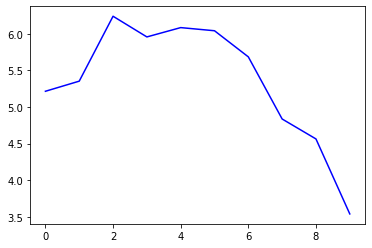

real 9.0


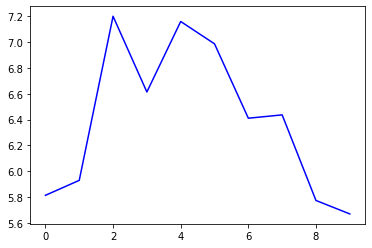

real 8.0


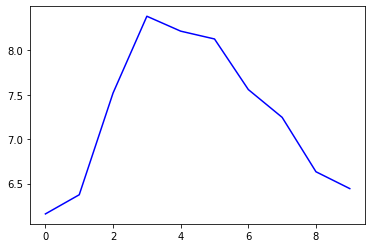

real 6.0


In [4]:
for i in range(3):
    plot_glucose_ts(X_train[i].reshape(-1,1))
    plt.show()
    print('real', y_train[i])

In [5]:
def calculate_dummy_score(glucose_array):
    return np.round(np.clip(19-2*np.mean(glucose_array, axis=1), 1, 10))

In [6]:
y_star = calculate_dummy_score(X_test)
print(accuracy_score(y_star, y_test))
print(abs_acc_score(y_star, y_test))

0.2375
1.2375


In [7]:
clf = RidgeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_star = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(abs_acc_score(y_star, y_test))

0.35
1.0


In [8]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_star = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(abs_acc_score(y_star, y_test))

0.3625
0.925


In [9]:
fit = glucose_model_fit('glucose_score', X_train, y_train)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [10]:
fit.diagnose()

'Processing csv files: ./posterior_data/glucose_score-20220208203623_1.csv, ./posterior_data/glucose_score-20220208203623_2.csv, ./posterior_data/glucose_score-20220208203623_3.csv, ./posterior_data/glucose_score-20220208203623_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

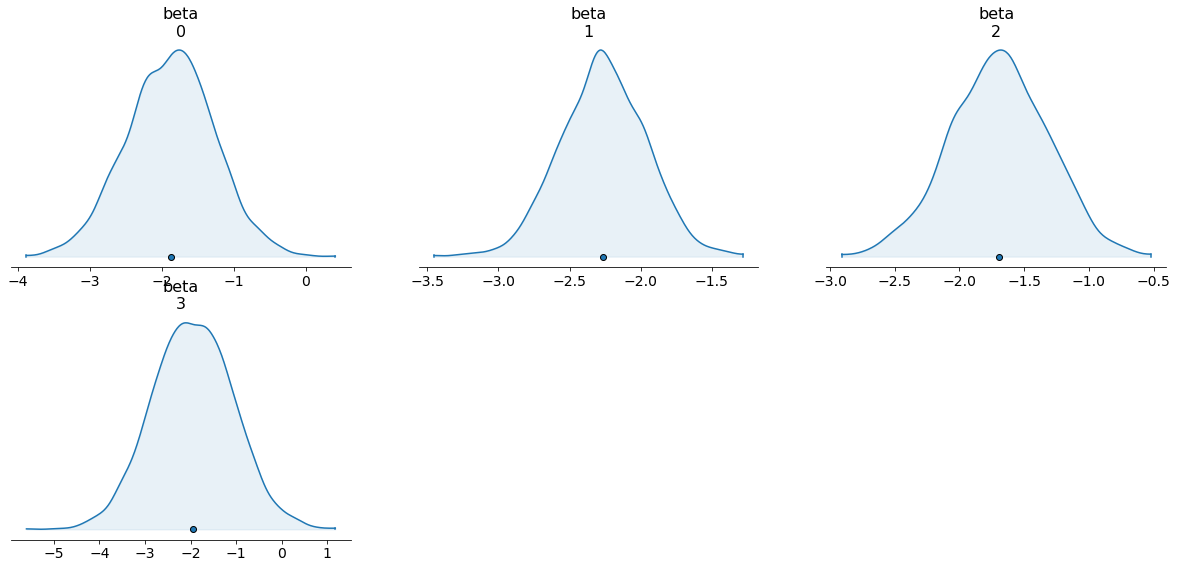

In [11]:
plot_post(fit, 'beta')

/home/coldditch/projects/veri/venv/lib/python3.9/site-packages/arviz/plots/pairplot.py:229: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


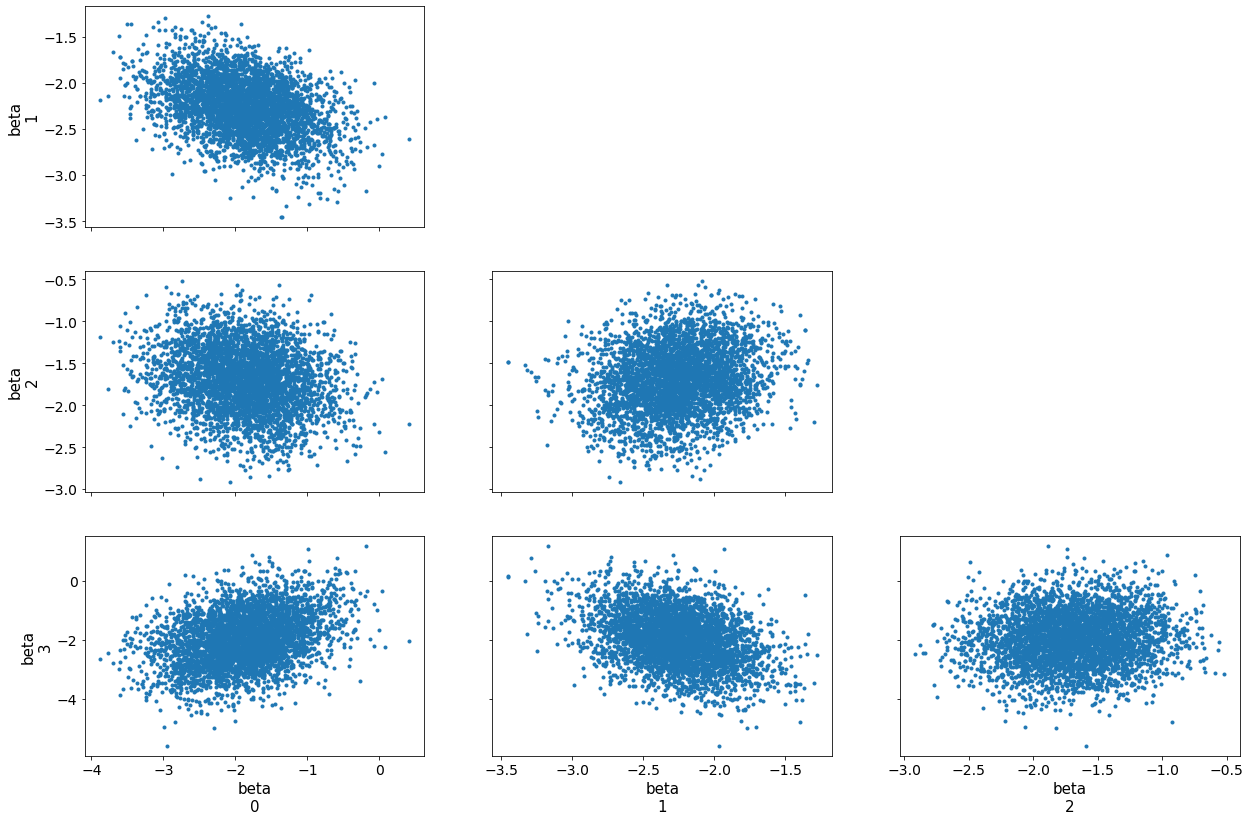

In [12]:
plot_samples_grid(fit, 'beta')

In [13]:
fit_pred_train = glucose_model_generate('glucose_score_gq', X_train)
fit_pred_test = glucose_model_generate('glucose_score_gq', X_test)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


In [14]:
print('Train data: (accuracy, absolute error)', model_acc(fit_pred_train, y_train))
print('Test data: (accuracy, absolute error)', model_acc(fit_pred_test, y_test))

Train data: (accuracy, absolute error) (0.525, 0.55)
Test data: (accuracy, absolute error) (0.525, 0.475)


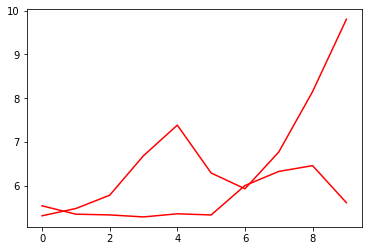

[10.  5.]
[8. 3.]


In [15]:
mask = -(pred_from_samples(fit_pred_train) - y_train)>1
plot_glucose_ts(X_train[mask].T, color='r')

plt.show()
print(y_train[mask])
print(pred_from_samples(fit_pred_train)[mask])

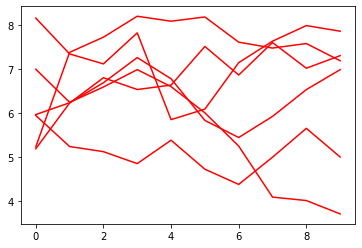

[7. 5. 4. 4. 6. 8.]
[ 9.  8.  6.  6.  8. 10.]


In [16]:
mask = (pred_from_samples(fit_pred_train) - y_train)>1
plot_glucose_ts(X_train[mask].T, color='r')
plt.show()
print(y_train[mask])
print(pred_from_samples(fit_pred_train)[mask])